# Project 1: Classification and Decision Trees

Harrison Blondeau, John Moroney, Mitch Rimerman

## 2.1 Animal Control and Shelter Data

### Data Import and Cleaning

Load the shelter_data.csv file - follow the sample code to see how to format and 
load from this file.

In [52]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [53]:
data = pd.read_csv('/home/shelter_data.csv')
data.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A671945,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [54]:
data.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [55]:
# this line drops any rows with missing data
cleaned_data = data.dropna()
# here we grab the data we want from pandas
X_data = cleaned_data[['AnimalType','SexuponOutcome','AgeuponOutcome']]
y_data = cleaned_data[['OutcomeType']]
enc = OrdinalEncoder()
enc.fit(X_data)
le = preprocessing.LabelEncoder()
le.fit(y_data)
data_categorical = pd.DataFrame(enc.transform(X_data),
columns=list(X_data))
X=data_categorical
y=le.transform(y_data)
# Without changing the random state, divide your data into 50% for test and 50% for train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.5, random_state=42)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
X_train.head()

,AnimalType,SexuponOutcome,AgeuponOutcome
1714,1.0,1.0,18.0
6851,0.0,2.0,16.0
6731,1.0,2.0,27.0
3836,1.0,2.0,3.0
6654,1.0,2.0,18.0


In [57]:
y_train

array([2, 3, 3, ..., 3, 0, 2])

### Decision Tree Model

Train a new decision tree using 
- `short_tree = tree.DecisionTreeClassifier(max_depth=3)`
- And then, use the scikit-learn functions to train and test this decision tree, 
including plotting the confusion matrix (as above) and plotting the smaller 
decision tree.   

In [58]:
short_tree = tree.DecisionTreeClassifier(max_depth=3)
clf = short_tree.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred))

accuracy 0.66 


Below is the confusion matrix for the short decision tree.

In [59]:
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred))
labels=['Adoption', 'Died', 'Euthanasia', 'Transfer']
test_results = pd.DataFrame(cm,index=labels,columns=labels)
display(test_results)

,Adoption,Died,Euthanasia,Transfer
Adoption,65,0,0,786
Died,0,0,0,35
Euthanasia,0,0,1,360
Transfer,3,0,1,2239


Below is a plot of the short decision tree

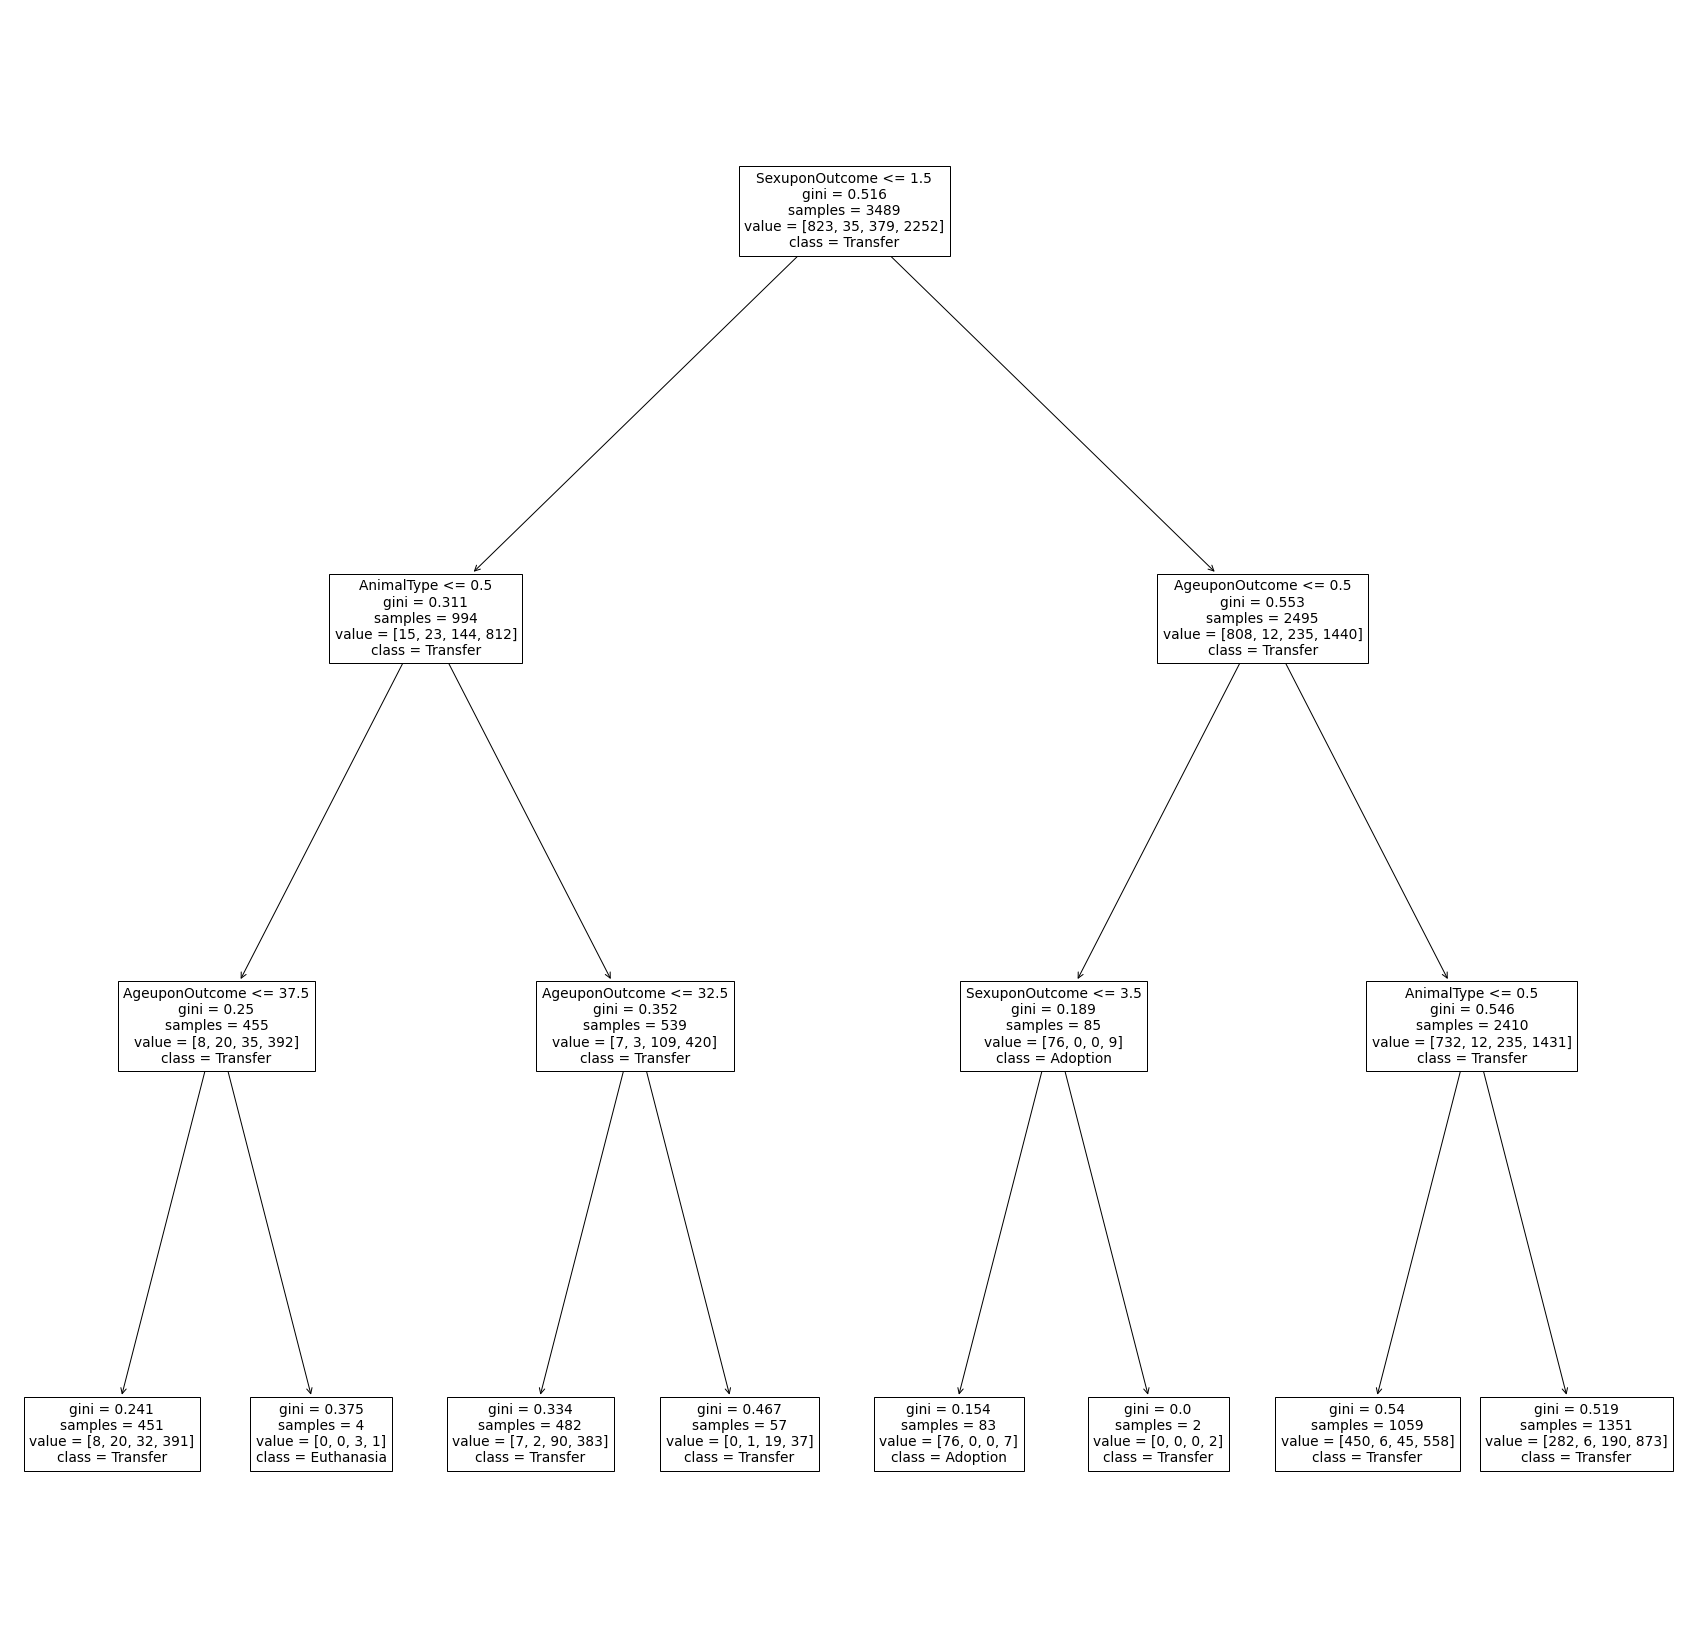

In [60]:
fig,ax = plt.subplots(figsize = (30,30))
treeplot = tree.plot_tree(clf, feature_names=['AnimalType','SexuponOutcome','AgeuponOutcome'],
class_names = ['Adoption', 'Died', 'Euthanasia', 'Transfer'],ax=ax)

### Tree Depth Tuning

Vary the decision tree depth in a loop, increasing depth from 3 to 10. Make a plot 
of training and test set error as the decision tree depth is varied.  

On the x-axis should be your depth parameter and on the y-axis the error. Plot 
both the training and test set error as two separate curves. Label your plot and 
give it a legend. Write a small description (two sentences) in a markdown cell 
below this plot, explaining what it is.  

In [61]:
def vary_max_depth(start, end, X_train, X_test, y_train, y_test):
  end = end+1
  train_errors = []
  test_errors = []
  for i in range(start,end):
    clf_depth = tree.DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    y_train_pred_depth = clf_depth.predict(X_train)
    y_pred_depth = clf_depth.predict(X_test)
    train_errors.append(accuracy_score(y_train,y_train_pred_depth))
    test_errors.append(accuracy_score(y_test,y_pred_depth))

  plt.plot(range(start,end),train_errors, label='Train')
  plt.plot(range(start,end),test_errors, label='Test')
  plt.legend(loc='upper left')
  plt.xlabel('Depth parameter')
  plt.ylabel('Performance')

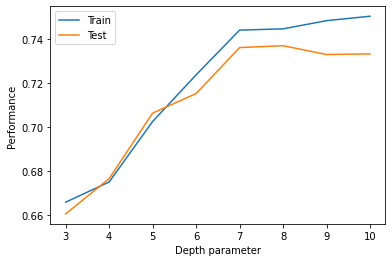

In [62]:
vary_max_depth(3,10,X_train, X_test, y_train, y_test)

This is a plot of of the testng and training accuracies when the depth of decision tree is varied from 3 to 10. We see that the accuracy of the training set increases with depth, while the testing accuracy peaks at a max depth of 7 or 8, pointing to overfitting when having a max depth that is too large.

### Pruning

Use pruning to control the complexity of the decision tree. Pruning uses a complexity parameter to control tree size and remove unnecessary nodes.
1. `ccp_alpha` is a parameter that controls complexity 
2. You should see how to get a range of values for this parameter and how to use it to control the complexity of a decision tree, as we did for depth in the previous example. 
3. The documentation shows how accuracy can change as a function of this ccp-alpha parameter (you can extract and run this code on your own data). 

First, we will explore the different effects of `ccp_alpha` by examining how it affects the tree and its accuracy.

In [63]:
clf = tree.DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [64]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03172364622964907


Since the number of nodes in the last tree is 1, it is the trivial tree. Thus, we will only consider the `ccp_alpha` that exclude that final alpha.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

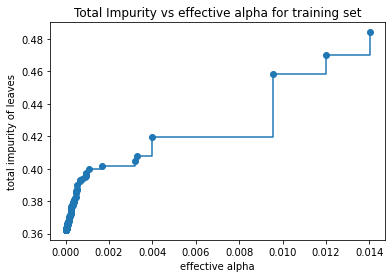

In [65]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

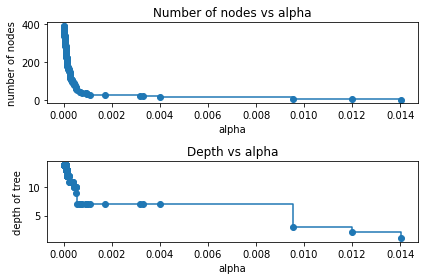

In [66]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

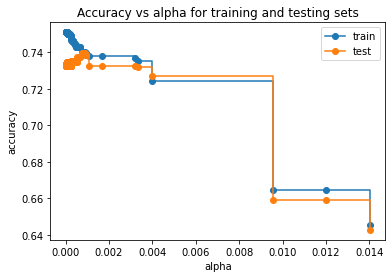

In [67]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Visually, we can see that the best value for `ccp_alpha` is around .0001. Now we will write a function to find that ideal value.

In [68]:
def best_ccp_alpha():
  clf = tree.DecisionTreeClassifier()
  path = clf.cost_complexity_pruning_path(X_train, y_train)
  ccp_alphas, impurities = path.ccp_alphas, path.impurities

  clfs = []
  for ccp_alpha in ccp_alphas:
      clf = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
      clf.fit(X_train, y_train)
      clfs.append(clf)

  if clfs[-1].tree_.node_count:
    clfs = clfs[:-1]
    ccp_alphas = ccp_alphas[:-1]

  test_scores = [clf.score(X_test, y_test) for clf in clfs]
  best_alpha_index = test_scores.index(max(test_scores))
  return ccp_alphas[best_alpha_index]

In [69]:
best_ccp_alpha()

0.0007523645743766124

Plot a pruned decision tree. A good value for ccp_alpha is the mean, about 0.0007.

Compare the accuracy of both the pruned and unpruned trees on the test set. Display a confusion matrix for both the original and pruned decision tree. 

In [70]:
best_alpha = best_ccp_alpha()
tree_prune = tree.DecisionTreeClassifier(ccp_alpha=best_alpha)
clf_pruned = tree_prune.fit(X_train, y_train)
y_pred_pruned = clf_pruned.predict(X_test)
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred_pruned))

accuracy 0.74 


With an accuracy of `.74`, the pruned tree appears to be better than the short tree, which had an accuracy of `.66`.

Below is a plot of the pruned decision tree.

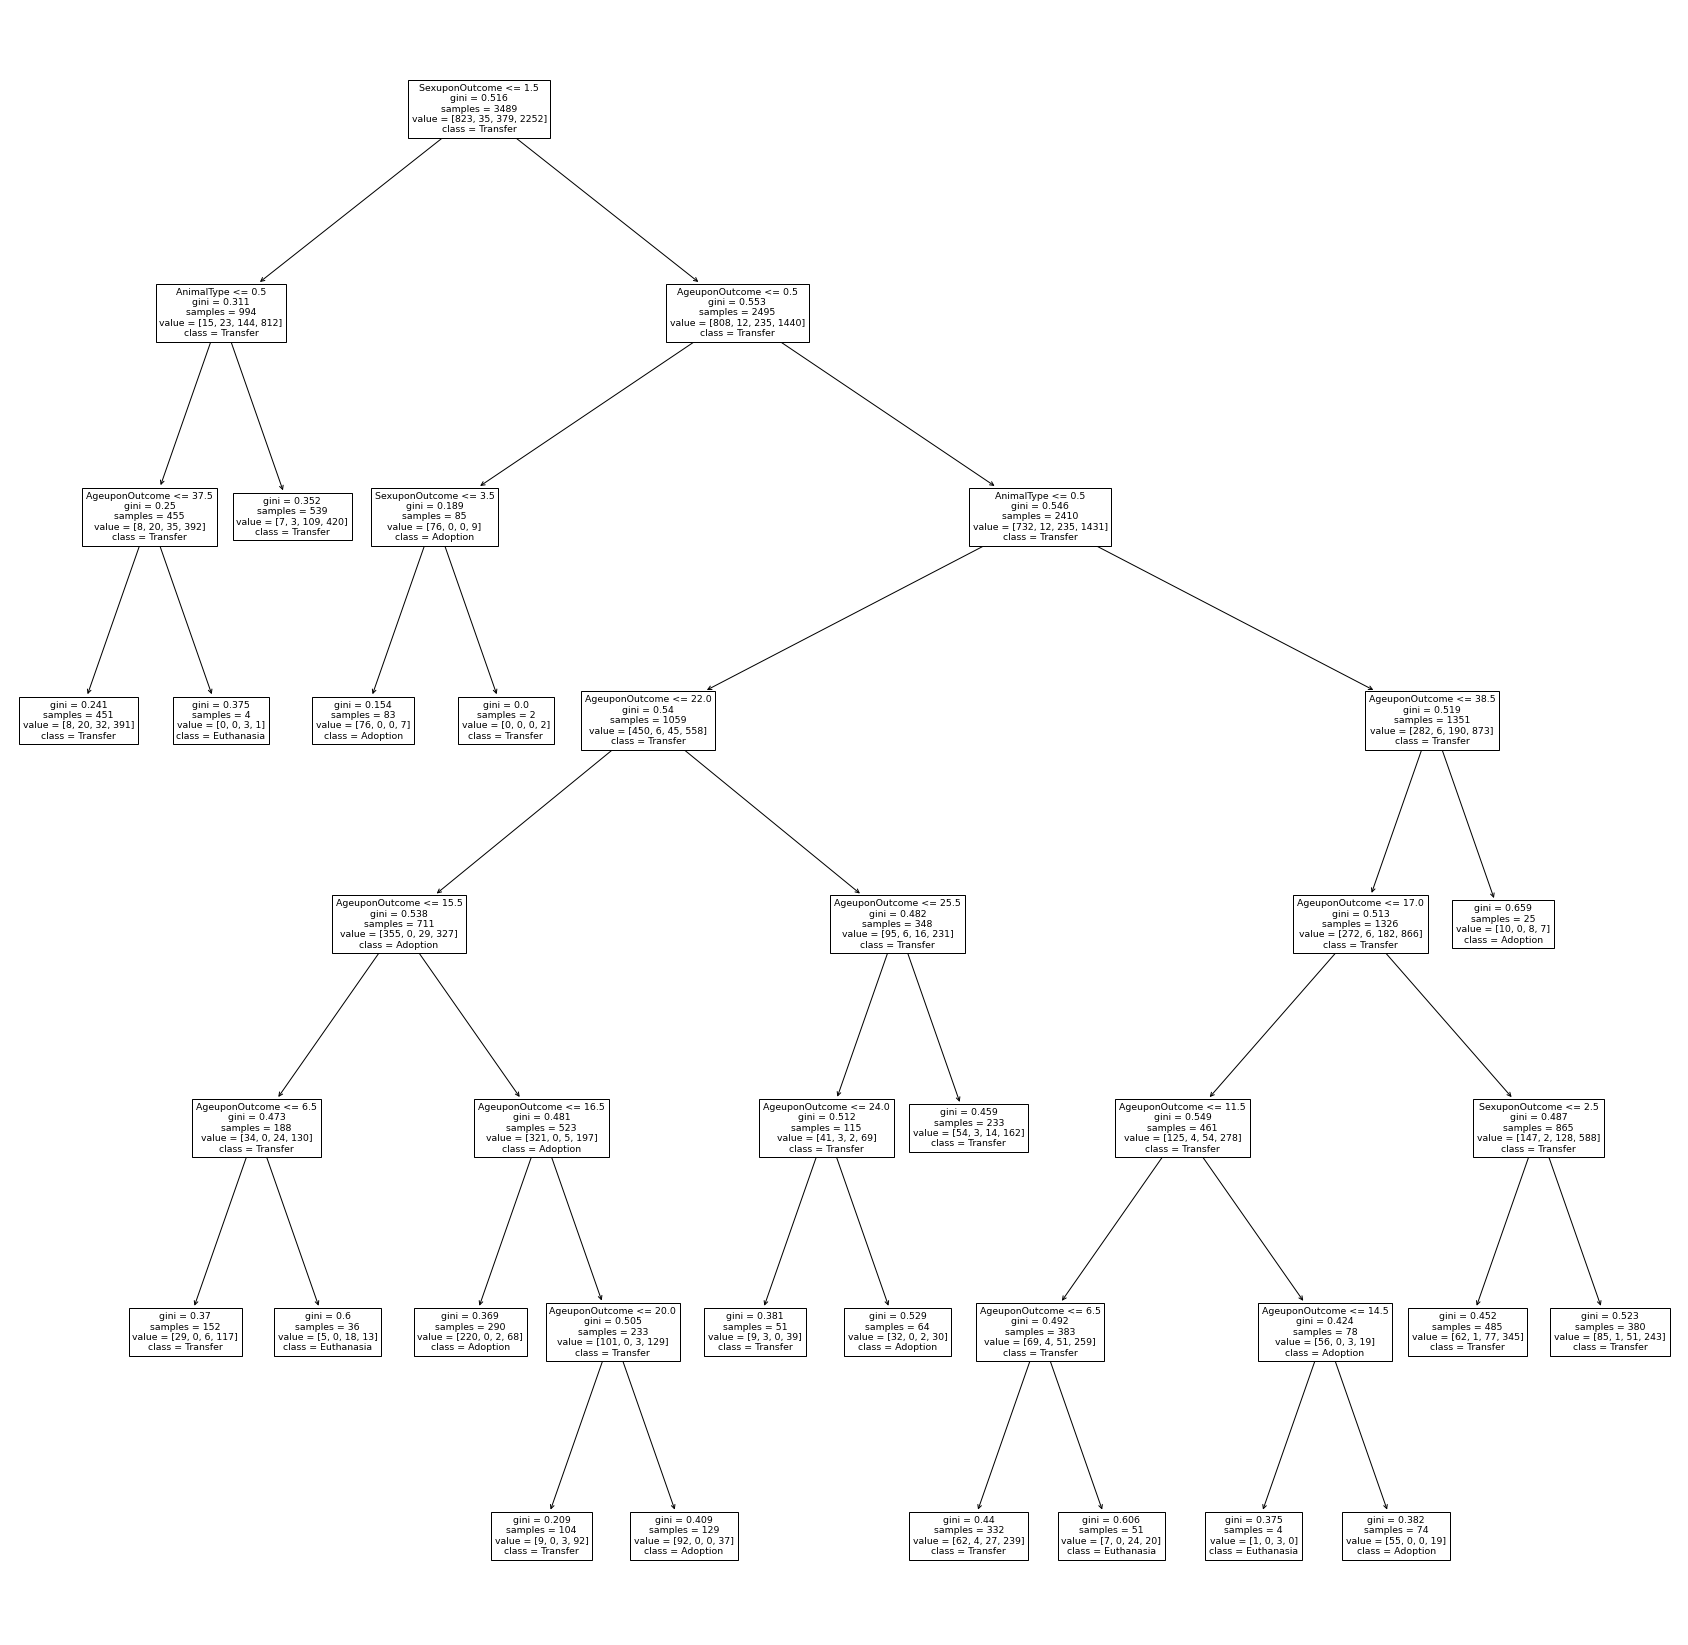

In [71]:
fig,ax = plt.subplots(figsize = (30,30))
treeplot = tree.plot_tree(clf_pruned, feature_names=['AnimalType','SexuponOutcome','AgeuponOutcome'],
class_names = ['Adoption', 'Died', 'Euthanasia', 'Transfer'],ax=ax)

Below are confusion matrices for both the original and pruned decision trees.

Original:

In [72]:
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred))
labels=['Adoption', 'Died', 'Euthanasia', 'Transfer']
test_results = pd.DataFrame(cm,index=labels,columns=labels)
display(test_results)

,Adoption,Died,Euthanasia,Transfer
Adoption,65,0,0,786
Died,0,0,0,35
Euthanasia,0,0,1,360
Transfer,3,0,1,2239


Pruned:

In [73]:
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred_pruned))
labels=['Adoption', 'Died', 'Euthanasia', 'Transfer']
test_results = pd.DataFrame(cm,index=labels,columns=labels)
display(test_results)

,Adoption,Died,Euthanasia,Transfer
Adoption,485,0,17,349
Died,4,0,2,29
Euthanasia,7,0,33,321
Transfer,150,0,30,2063


## 2.2 Text Data

### Data Import and Cleaning

In [74]:
text_data = pd.read_csv('/home/text_data.csv')
text_data.describe()

,Unnamed: 0,000,10,11,13,136,13th,1648,1683,1685,...,yielding,yoke,yokes,york,young,yourselves,zaleucus,zeal,zealand,zealous
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,42.000000,0.023529,0.023529,0.023529,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,...,0.035294,0.023529,0.011765,1.764706,0.035294,0.011765,0.011765,0.305882,0.011765,0.094118
std,24.681302,0.216930,0.216930,0.216930,0.108465,0.108465,0.108465,0.108465,0.108465,0.108465,...,0.185617,0.152477,0.108465,1.893894,0.185617,0.108465,0.108465,0.617667,0.108465,0.397118
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [75]:
text_data.head()

,Unnamed: 0,meta_author,meta_title,000,10,11,13,136,13th,1648,...,yielding,yoke,yokes,york,young,yourselves,zaleucus,zeal,zealand,zealous
0,0,hamilton,general introduction for the independent journ...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,3,0,0
1,1,jay,concerning dangers from foreign force and infl...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,jay,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,jay,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,jay,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0


In [76]:
# Convert the raw data file into labels and predictor columns
X = text_data.iloc[:,3:] 
le = preprocessing.LabelEncoder()
labels = text_data['meta_author']
le.fit(labels)
y=le.transform(labels)

# Create a test train split using random_state=42 and dividing rows
# using a 90% training and 10% testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, random_state=42)

In [77]:
X_train.head()

,000,10,11,13,136,13th,1648,1683,1685,1688,...,yielding,yoke,yokes,york,young,yourselves,zaleucus,zeal,zealand,zealous
66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,0,0,...,1,0,0,2,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [78]:
y_train

array([0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 3, 0, 0, 2, 2, 2, 1, 3, 2, 0, 0, 0, 2, 0, 2, 2,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 2])

### Base Decision Tree

In [79]:
# Create the decision tree 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)   #Fit on training data
y_pred = clf.predict(X_test)
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred))

accuracy 0.56 


### Tree Depth Tuning



Vary the depth of the tree you train on the text dataset. Make sure to set the test size to 0.10. Plot the accuracy (train and test) as you vary the depth of the tree from 1 to 15.  

Below is the plot of accuracy when varying tree depth for the original data set.

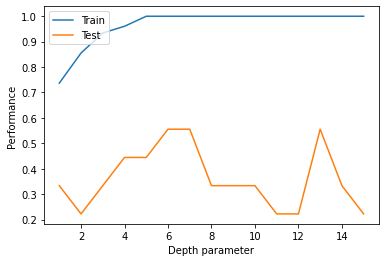

In [81]:
vary_max_depth(1,15,X_train, X_test, y_train, y_test)

Vary the depth of a decision tree trained on the text dataset, as before, but this time only using the rare words in the dataset. 

Now we will fine-tune the data by choosing words that only appear once in the Federalist Papers.

In [82]:
# With a simple code, you can see the frequency of the words
text_frequecies = X.sum()
text_frequecies.sort_values()
display(text_frequecies)
kept_words = text_frequecies[text_frequecies<2]
# this line (above) first creates a binary vector for each word, telling us if it appears twice or more
# in the dataset. it then uses that vector to index into text_frequencies to subset only the data
# for which this binary vector evaluates to TRUE. This simple indexing can really help to chop through
# a huge pandas dataframe.
print(kept_words)
small_vocab_X = X[kept_words.index]
# notice how kept_words.index is a list of strings, the same you can use to access the headers of X..

000            2
10             2
11             2
13             1
136            1
              ..
yourselves     1
zaleucus       1
zeal          26
zealand        1
zealous        8
Length: 8560, dtype: int64

13            1
136           1
13th          1
1648          1
1683          1
             ..
yes           1
yokes         1
yourselves    1
zaleucus      1
zealand       1
Length: 2975, dtype: int64


Below is a plot of accuracy when varying tree depth for the rare words dataset.

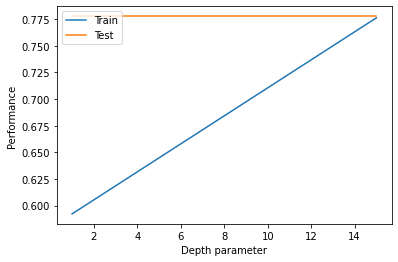

In [84]:
# Repeat the previous analysis with the small word dataset
# Split the small world data into a 90/10 train test split. Use random_state=42.
X_small_train, X_small_test, y_train, y_test = train_test_split(small_vocab_X, y, train_size = 0.9, random_state=42)

# Iterate model depth. Plot accuracies
vary_max_depth(1,15,X_small_train, X_small_test, y_train, y_test)

Now we will examine the impact on the decision tree when only selecting frequently used words.

In [85]:
# Same as before create the most frequent words
kept_words2 = text_frequecies[text_frequecies>100]
# this line (above) first creates a binary vector for each word, telling us if it appears twice or more
# in the dataset. it then uses that vector to index into text_frequencies to subset only the data
# for which this binary vector evaluates to TRUE. This simple indexing can really help to chop through
# a huge pandas dataframe.
print(kept_words2)
large_vocab_X = X[kept_words2.index]

against    331
all        731
america    115
among      129
another    155
          ... 
whole      139
within     118
without    207
yet        121
york       150
Length: 150, dtype: int64


Below is a plot of accuracy for varying depth for the frequently used words dataset.

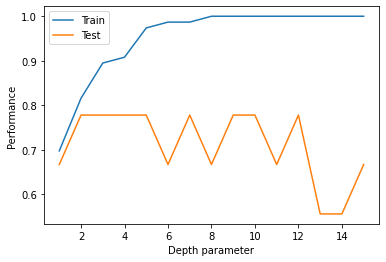

In [86]:
# Repeat the previous analysis with the small word dataset
# Split the small world data into a 90/10 train test split. Use random_state=42.
X_large_train, X_large_test, y_train, y_test = train_test_split(large_vocab_X, y, train_size = 0.9, random_state=42)

# Iterate model depth. Plot accuracies
vary_max_depth(1,15,X_large_train, X_large_test, y_train, y_test)

In [87]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_large_train, y_train)   #Fit on training data
y_pred = clf.predict(X_large_test)
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred))

accuracy 0.78 


## 2.3 Audio Data (Drum Sounds)

### Data Import and Wrangling

In [88]:
# Read in data
audio_data = pd.read_csv('/home/audio_data.csv')
audio_data.describe()

,Unnamed: 0,label,0.00 hz,86.13 hz,172.27 hz,258.40 hz,344.53 hz,430.66 hz,516.80 hz,602.93 hz,...,10249.80 hz,10335.94 hz,10422.07 hz,10508.20 hz,10594.34 hz,10680.47 hz,10766.60 hz,10852.73 hz,10938.87 hz,11025.00 hz
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02
mean,105.500000,0.448113,3.624958,17.416965,8.596787,3.566502,1.000167,0.591471,0.458107,0.272973,...,5.081631e-04,3.644158e-04,2.388318e-04,1.298940e-04,5.193798e-05,1.519868e-05,3.533626e-06,6.712768e-07,9.091606e-08,6.313396e-09
std,61.343296,0.498478,6.942545,26.438515,9.235777,4.788102,1.544003,1.183579,1.033818,0.438555,...,8.586429e-04,6.526129e-04,4.844244e-04,2.545205e-04,1.072925e-04,3.001521e-05,6.106023e-06,1.313119e-06,1.898266e-07,1.143963e-08
min,0.000000,0.000000,0.001527,0.000948,0.003451,0.023271,0.004121,0.001391,0.000347,0.000163,...,3.621452e-08,3.443271e-08,1.849979e-08,5.991134e-09,4.987205e-09,8.123556e-10,3.550325e-10,8.939242e-11,8.800568e-12,5.490084e-13
25%,52.750000,0.000000,0.064840,0.217712,2.332045,0.336935,0.076210,0.037117,0.017721,0.012821,...,4.174945e-06,2.944346e-06,1.856348e-06,8.194084e-07,2.636999e-07,1.042592e-07,1.984290e-08,3.470632e-09,4.616096e-10,5.699681e-11
50%,105.500000,0.000000,0.488410,3.617768,6.081414,1.707556,0.459056,0.260691,0.202617,0.118620,...,1.162325e-04,8.833813e-05,5.552127e-05,2.563628e-05,1.019511e-05,3.744049e-06,9.070992e-07,1.677709e-07,1.739184e-08,1.160822e-09
75%,158.250000,1.000000,4.309501,24.334535,11.312375,4.999953,1.197420,0.630419,0.550811,0.378223,...,6.407021e-04,4.739844e-04,2.912185e-04,1.680799e-04,6.742486e-05,1.851275e-05,4.349353e-06,7.235192e-07,9.673274e-08,7.282709e-09
max,211.000000,1.000000,66.582860,190.067730,56.203686,31.318716,10.232034,12.798109,12.753410,3.378856,...,5.823903e-03,4.541307e-03,3.899693e-03,2.203800e-03,7.747787e-04,2.575438e-04,4.113468e-05,9.834714e-06,1.392894e-06,7.029924e-08


In [89]:
audio_data.head()

,Unnamed: 0,filename,label_text,label,0.00 hz,86.13 hz,172.27 hz,258.40 hz,344.53 hz,430.66 hz,...,10249.80 hz,10335.94 hz,10422.07 hz,10508.20 hz,10594.34 hz,10680.47 hz,10766.60 hz,10852.73 hz,10938.87 hz,11025.00 hz
0,0,70Funk.wav,snare,0,0.117469,0.201065,3.666227,7.554432,5.356165,2.470225,...,0.000272,0.000199,0.000083,0.000071,0.000068,0.000041,0.000003,5.277616e-07,1.054685e-07,7.286777e-09
1,1,8oh8 Rim.wav,snare,0,0.003148,0.012814,0.375678,1.050320,0.164903,0.089524,...,0.001122,0.000737,0.000304,0.000211,0.000128,0.000036,0.000006,1.266412e-06,1.366164e-07,3.532417e-09
2,2,8oh8 Tin.wav,snare,0,0.006759,0.039368,0.385903,0.254091,0.086651,0.137728,...,0.000633,0.000391,0.000169,0.000128,0.000074,0.000024,0.000003,7.285032e-07,7.223851e-08,2.491626e-09
3,3,8oh8 Snr.wav,snare,0,0.003083,0.001359,0.021241,0.053261,0.026645,0.393541,...,0.004249,0.002850,0.001079,0.000781,0.000527,0.000161,0.000024,5.044927e-06,5.018216e-07,5.197483e-08
4,4,9oh9 Rim.wav,snare,0,0.006571,0.007394,0.033357,0.458574,1.056414,0.435841,...,0.000267,0.000211,0.000077,0.000065,0.000033,0.000008,0.000003,7.358946e-07,4.149365e-08,3.860568e-09


In [90]:
# Convert the raw data file into labels and predictor columns
X = audio_data.iloc[:,4:] 
le = preprocessing.LabelEncoder()
labels = audio_data['label']
le.fit(labels)
y=le.transform(labels)

# Create a test train split using random_state=42 and dividing rows
# using a 80% training and 20% testing split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [91]:
X_train.head()

,0.00 hz,86.13 hz,172.27 hz,258.40 hz,344.53 hz,430.66 hz,516.80 hz,602.93 hz,689.06 hz,775.20 hz,...,10249.80 hz,10335.94 hz,10422.07 hz,10508.20 hz,10594.34 hz,10680.47 hz,10766.60 hz,10852.73 hz,10938.87 hz,11025.00 hz
127,1.024466,13.755575,4.170626,0.076150,0.006068,0.003038,0.001348,0.000542,0.000959,0.001343,...,5.536045e-07,0.000001,0.000002,8.473256e-07,2.508649e-07,9.460412e-08,1.707145e-08,2.961786e-09,4.686166e-10,7.648930e-12
108,0.029220,0.098834,1.281389,1.259713,0.200623,0.306050,0.390866,0.266909,0.235178,0.099024,...,1.181563e-04,0.000067,0.000049,1.341928e-05,1.029776e-05,4.773829e-06,7.730336e-07,1.222560e-07,1.229697e-08,8.025265e-10
69,0.019290,0.195616,2.089700,1.190657,0.072013,0.099298,0.176583,0.054952,0.053365,0.091523,...,7.653159e-05,0.000063,0.000044,1.495021e-05,3.592712e-06,1.246402e-06,2.248709e-07,3.108465e-08,4.483240e-09,3.121887e-10
84,0.135585,1.435691,13.425385,6.936618,0.612777,0.504011,0.430345,0.073363,0.106702,0.082072,...,1.919179e-04,0.000165,0.000135,6.381947e-05,2.654708e-05,9.278426e-06,2.307722e-06,3.929850e-07,5.714931e-08,2.394659e-09
97,0.073459,0.121638,4.863998,10.495002,1.847593,0.379259,0.317673,0.589242,0.093782,0.151806,...,6.028930e-04,0.000403,0.000207,2.260159e-04,8.323488e-05,1.631262e-05,5.347583e-06,4.314026e-07,8.803191e-08,1.094737e-08


In [92]:
y_train

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0])

### Varying Tree Depth

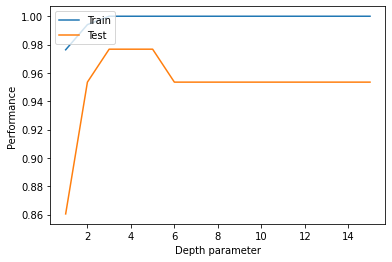

In [93]:
vary_max_depth(1,15,X_train, X_test, y_train, y_test)

### Decision Tree with Depth of 5

In [94]:
# Create the decision tree 
five_tree = tree.DecisionTreeClassifier(max_depth=5)
clf = five_tree.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred))

accuracy 0.95 


In [95]:
# Confusion Matrix
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred))
labels=['Snare', 'Kick']
test_results = pd.DataFrame(cm,index=labels,columns=labels)
display(test_results)

,Snare,Kick
Snare,20,1
Kick,1,21


Below is a plot of the Decision Tree prior to dropping one training observation.

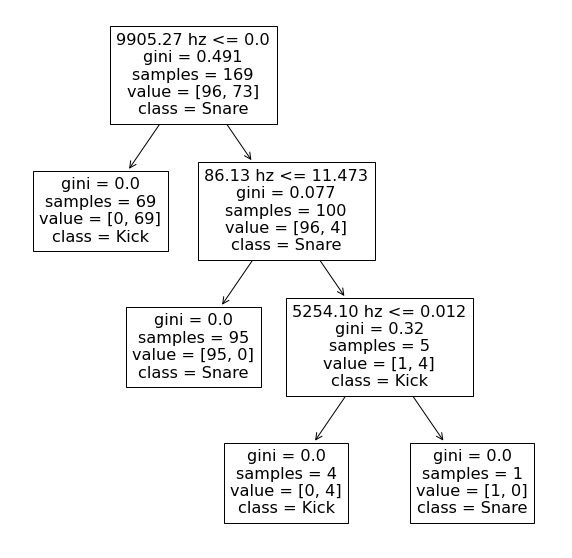

In [96]:
# Plot the tree
fig,ax = plt.subplots(figsize = (10,10))
treeplot = tree.plot_tree(clf, feature_names=X.columns,
class_names = ['Snare', 'Kick'],ax=ax)

### Dropping an Observation

In [97]:
# Make dropped sets
X_dropped = X.drop(1)
y= pd.Series(y) 
y_drop = y.drop(1) 
X_train, X_test, y_train, y_test = train_test_split(X_dropped, y_drop,test_size=0.20, random_state=42)

### Varying Tree Depth when Element is Dropped

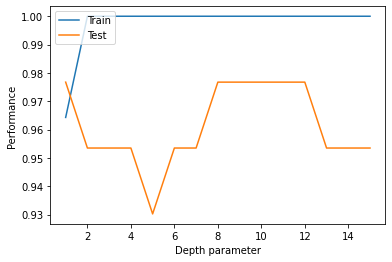

In [98]:
# Same process but with one dropped
vary_max_depth(1,15,X_train, X_test, y_train, y_test)

### New Decision Tree with Depth of 5

In [99]:
# Create the decision tree 
five_tree = tree.DecisionTreeClassifier(max_depth=5)
clf = five_tree.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred))

accuracy 0.95 


In [100]:
# Confusion Matrix
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred))
labels=['Snare', 'Kick']
test_results = pd.DataFrame(cm,index=labels,columns=labels)
display(test_results)

,Snare,Kick
Snare,21,0
Kick,2,20


Below is a plot of the Decision Tree after dropping one training observation.

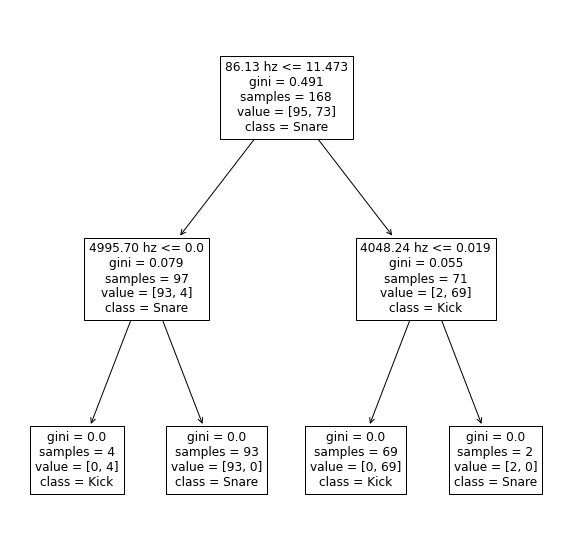

In [102]:
# Plot the tree
fig,ax = plt.subplots(figsize = (10,10))
treeplot = tree.plot_tree(clf, feature_names=X.columns,
class_names = ['Snare', 'Kick'],ax=ax)

Above is the 2nd tree

In [103]:
print("Complete!")

Complete!
